In [1]:
import json
import pandas as pd

In [2]:
with open('inaturalist_train_label.json', 'r') as file:
    train_labels = json.load(file)

In [3]:
with open('inaturalist_test_label.json', 'r') as file:
    test_labels = json.load(file)

In [4]:
with open('inaturalist_val_label.json', 'r') as file:
    val_labels = json.load(file)

In [5]:
train_labels_dataframe = pd.DataFrame(train_labels['data'])
test_labels_dataframe = pd.DataFrame(test_labels['data'])
val_labels_dataframe = pd.DataFrame(val_labels['data'])

In [6]:
combined_dataframe = pd.concat([train_labels_dataframe, test_labels_dataframe, val_labels_dataframe])

In [7]:
combined_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 167527 entries, 0 to 33128
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   wav      167527 non-null  object
 1   labels   167527 non-null  int64 
 2   caption  167527 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.1+ MB


In [7]:
combined_dataframe['labels'].value_counts()

labels
986    1200
912    1200
960    1200
983    1200
554    1200
       ... 
96        1
396       1
190       1
58        1
69        1
Name: count, Length: 1244, dtype: int64

In [8]:
combined_dataframe = combined_dataframe.groupby('labels').filter(lambda g: len(g) >= 50)

In [9]:
combined_dataframe['labels'].value_counts()

labels
1042    1200
498     1200
849     1200
986     1200
824     1200
        ... 
522       50
109       50
838       50
953       50
623       50
Name: count, Length: 544, dtype: int64

In [10]:
print(len(combined_dataframe))

159165


In [11]:
combined_dataframe.reset_index(drop=True, inplace=True)

In [12]:
combined_dataframe

,wav,labels,caption
0,train/train/03612_Animalia_Chordata_Aves_Passe...,843,White-throated Sparrow
1,train/train/04361_Animalia_Chordata_Aves_Passe...,961,House Wren
2,train/train/02061_Animalia_Chordata_Aves_Cucul...,347,Asian Koel
3,train/train/01399_Animalia_Chordata_Aves_Accip...,2,Cooper's Hawk
4,train/train/02978_Animalia_Chordata_Aves_Passe...,592,Tree Swallow
...,...,...,...
159160,val/val/03608_Animalia_Chordata_Aves_Passerifo...,839,Clay-colored Sparrow
159161,val/val/03608_Animalia_Chordata_Aves_Passerifo...,839,Clay-colored Sparrow
159162,val/val/03608_Animalia_Chordata_Aves_Passerifo...,839,Clay-colored Sparrow
159163,val/val/03608_Animalia_Chordata_Aves_Passerifo...,839,Clay-colored Sparrow


In [12]:
from sklearn.model_selection import train_test_split

In [13]:
def stratified_split(df, label_col='labels'):
    # Group by label and pick 10 samples per class for the test set
    test_df = df.groupby(label_col, group_keys=False).apply(lambda x: x.sample(n=5, random_state=42))

    # Remove test samples from the full dataset to form the training set
    train_df = df.drop(index=test_df.index)

    val_df = train_df.groupby(label_col, group_keys=False).apply(lambda x: x.sample(n=5, random_state=42))

    return train_df, val_df, test_df

# Usage
train_df, val_df, test_df = stratified_split(combined_dataframe, label_col='labels')


/var/folders/j3/n04hhwvx3v960l20mpqqltsh0000gn/T/ipykernel_10458/4055200822.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  test_df = df.groupby(label_col, group_keys=False).apply(lambda x: x.sample(n=5, random_state=42))
/var/folders/j3/n04hhwvx3v960l20mpqqltsh0000gn/T/ipykernel_10458/4055200822.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  val_df = train_df.groupby(label_col, group_keys=False).a

In [14]:
final_train_data = {}
final_val_data = {}
final_test_data = {}
final_train_data['data'] = train_df.to_dict('records')
final_val_data['data'] = val_df.to_dict('records')
final_test_data['data'] = test_df.to_dict('records')

In [15]:
print("train size:", len(train_df))
print("val size:", len(val_df))
print("test size:", len(test_df))

train size: 156445
val size: 2720
test size: 2720


In [16]:
with open("inaturalist_val_label_v1-4.json", "w") as f:
    json.dump(final_val_data, f)

In [1]:
 with open("inaturalist_train_label_v1-4.json", "w") as f:
    json.dump(final_train_data, f)

SyntaxError: invalid syntax (1523069714.py, line 1)

In [18]:
with open("inaturalist_test_label_v1-4.json", "w") as f:
    json.dump(final_test_data, f)

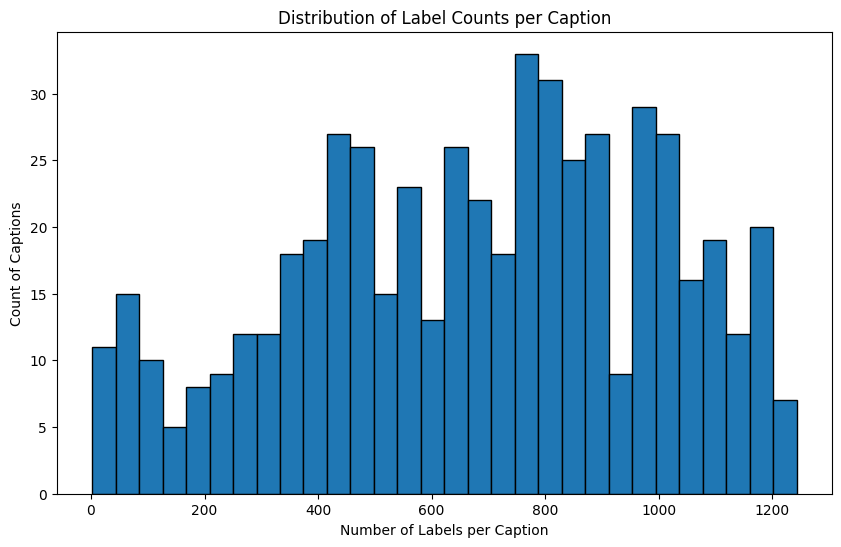

In [19]:
df_labels_per_caption = combined_dataframe[['caption', 'labels']].drop_duplicates().reset_index(drop=True)

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_labels_per_caption['labels'], bins=30, edgecolor='black')
plt.xlabel('Number of Labels per Caption')
plt.ylabel('Count of Captions')
plt.title('Distribution of Label Counts per Caption')
plt.show()